<a href="https://colab.research.google.com/github/Jesulolufemi/Effects-of-Music-on-Mental-Health/blob/main/Effects_on_Music_on_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/mxmh_survey_results.csv')

In [ ]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

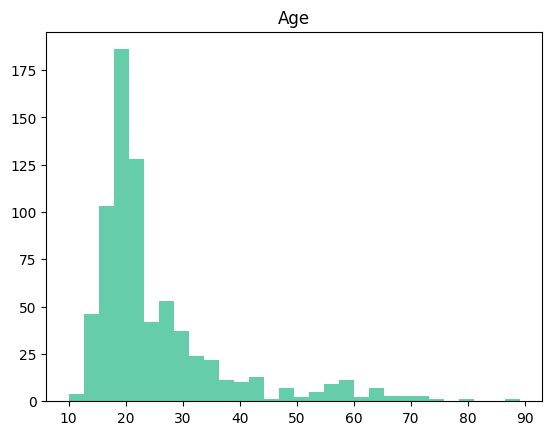

In [ ]:
df.hist(['Age'], bins=30, color='mediumaquamarine', grid=False)

In [ ]:
df['Age'].value_counts().loc[lambda x : x>50]

18.0    85
19.0    61
17.0    59
21.0    52
Name: Age, dtype: int64

In [ ]:
df['Age'].max()

89.0

Most respondents are in their late teens or early twenties. A single 89 year old respondent is an interesting outlier!

The age distribution makes sense, as the survey used to collect data was advertised in discussion forums and social media sites that target this demographic. This may introduce age bias, i.e. influencing which music genres are most popular.

Text(0, 0.5, '')

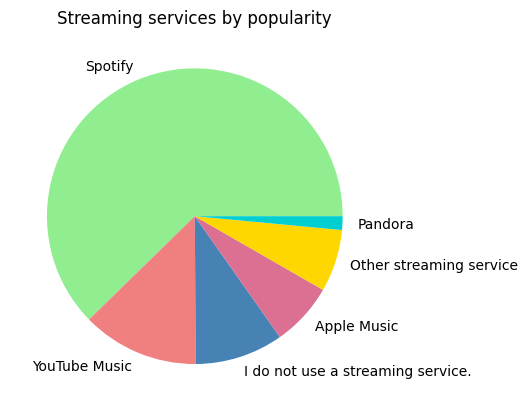

In [ ]:
s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

In [ ]:
df['Primary streaming service'].value_counts(normalize=True)

Spotify                              0.623129
YouTube Music                        0.127891
I do not use a streaming service.    0.096599
Apple Music                          0.069388
Other streaming service              0.068027
Pandora                              0.014966
Name: Primary streaming service, dtype: float64

<ipython-input-10-e06d65732ebf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",


Text(0.5, 1.0, 'Streaming services by Age')

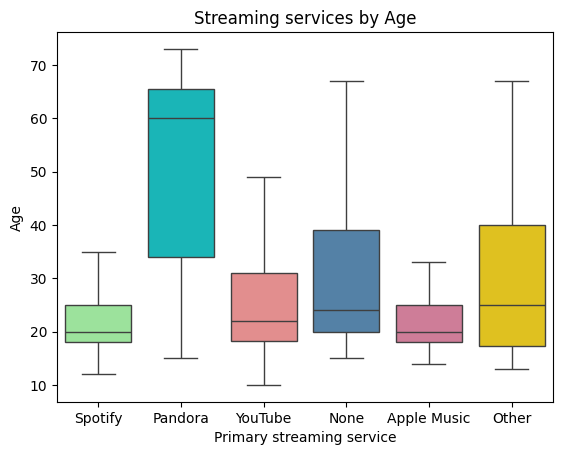

In [ ]:
s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Streaming services by Age')

In [ ]:
s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music    20.0
 None           24.0
 Other          25.0
 Pandora        60.0
 Spotify        20.0
 YouTube        22.0
 Name: Age, dtype: float64]

Spotify is the most popular music streaming service, accounting for 62% of all respondents. Spotify, along with Apple Music, also has a marginally younger userbase than other streaming platforms. Pandora has the oldest user base by far, with the median user age at ~60 years old.

array([[<Axes: title={'center': 'Hours per day'}>]], dtype=object)

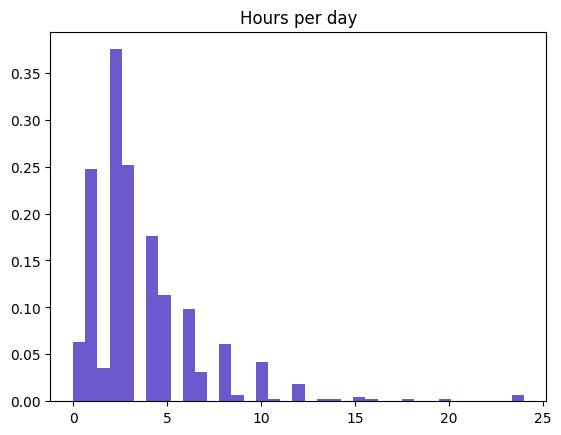

In [ ]:
df.hist(['Hours per day'], bins='auto', density=True, color = 'slateblue', grid=False)

In [ ]:
df['Hours per day'].value_counts().loc[lambda x : x>100]

2.0    173
3.0    120
1.0    117
Name: Hours per day, dtype: int64

The vast majority of respondents listen to music between 0-5 hours per day. After this threshold, the number of respondents that listen to music 5+ hours a day decreases almost exponentially. There are a few respondents that claim to listen to music 24 hours a day.

<Axes: ylabel='Composer'>

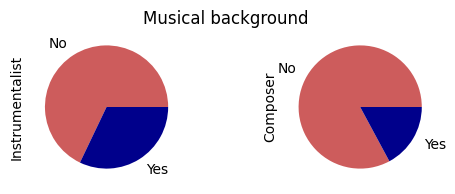

In [ ]:
fig = plt.figure(figsize=(6,2))

plt.suptitle("Musical background")

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

ax = fig.add_subplot(122)

comp = df['Composer'].value_counts()
comp.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

fig = plt.figure(figsize=(6,2))

plt.suptitle("Musical background")

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

ax = fig.add_subplot(122)

comp = df['Composer'].value_counts()
comp.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)
<AxesSubplot: ylabel='Composer'>

In [ ]:
df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

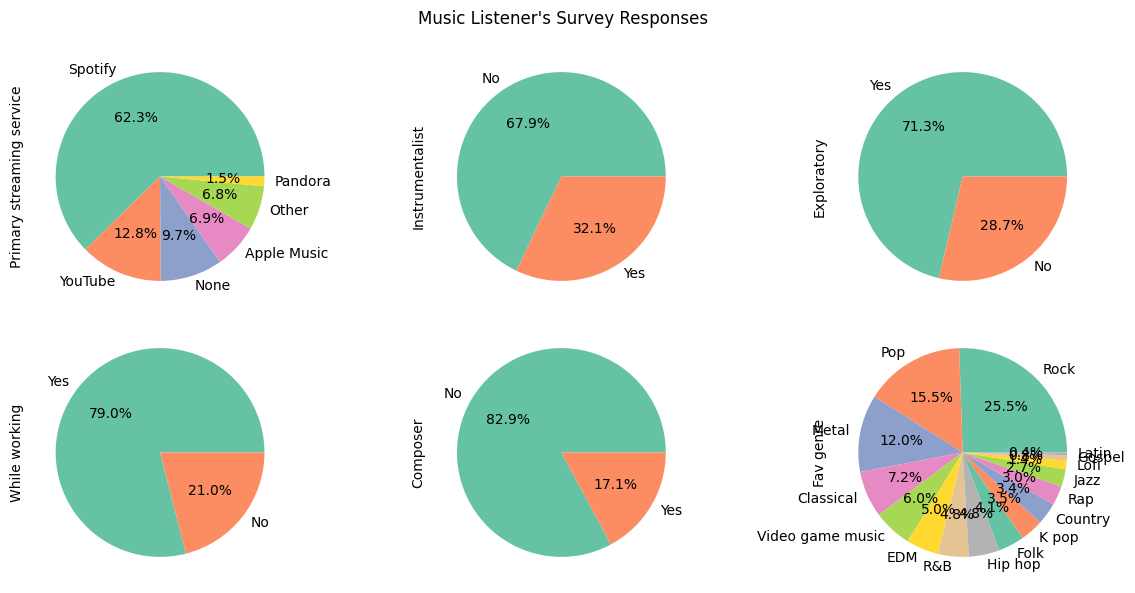

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), nrows=2, ncols=3)

# pie chart for proportion of primary streaming service
df['Primary streaming service'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 0])

# pie chart for proportion of listening to music while working
df['While working'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 0])

# pie chart for proportion of whether listener is a instrumentalist
df['Instrumentalist'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 1])

# pie chart for proportion of whether listener is a composer
df['Composer'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 1])

# pie chart for proportion of whether listener explores new music
df['Exploratory'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 2])

# pie chart for proportion of favourite genre
df['Fav genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 2])

plt.suptitle("Music Listener's Survey Responses")
plt.tight_layout()
plt.show()

Music genres

Text(0, 0.5, '')

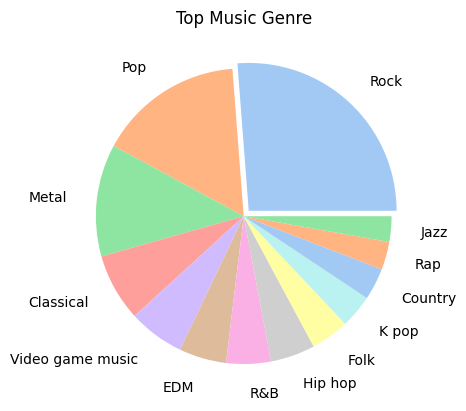

In [ ]:
genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2,
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
            colors = sns.color_palette('pastel')[0:13])

plt.title('Top Music Genre')
plt.ylabel("")

Rock is the most popular genre, being selected as an individual's favorite genre 1 out of 4 times. In terms of popularity, rock is followed by pop and metal. Lofi, Gospel, and Latin music were selected less than 0.14% of the time and do not appear in the above pi chart.

For a genre breakdown by listening frequency, please see the "(In Depth) Genres by Popularity" figure.

<ipython-input-17-468a50ed1220>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_genre['Genre'] = df_genre['Genre'].str.replace('Frequency ', '').str.replace('[', '').str.replace(']', '')


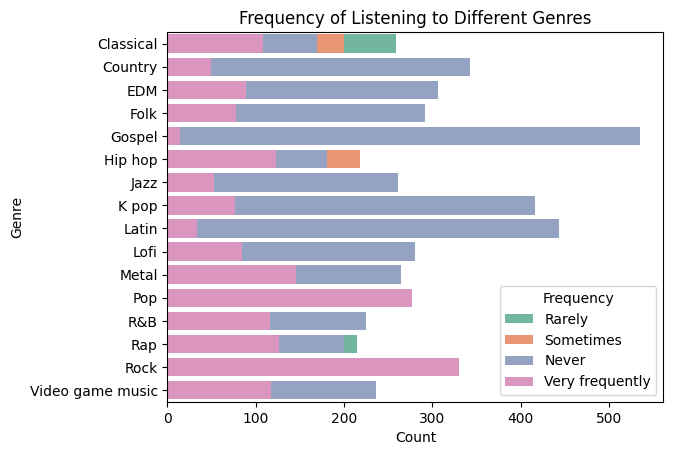

In [ ]:
# select only the columns that start with 'Frequency'
genre_col = [col for col in df.columns if col.startswith('Frequency')]

df_genre = df[genre_col]
df_genre

# reform the dataframe to have a single column for genre and a single column for frequency
df_genre = df_genre.melt(var_name='Genre', value_name='Frequency')

# remove the 'Frequency[]' prefix from the genre column
df_genre['Genre'] = df_genre['Genre'].str.replace('Frequency ', '').str.replace('[', '').str.replace(']', '')

df_genre

# stack count chart for frequency of listening to different genres
g = sns.countplot(y='Genre', data=df_genre, order=df_genre['Genre'].value_counts().index, hue='Frequency', dodge=False)
g.set_title('Frequency of Listening to Different Genres')
g.set_xlabel('Count')
g.set_ylabel('Genre')
plt.show()

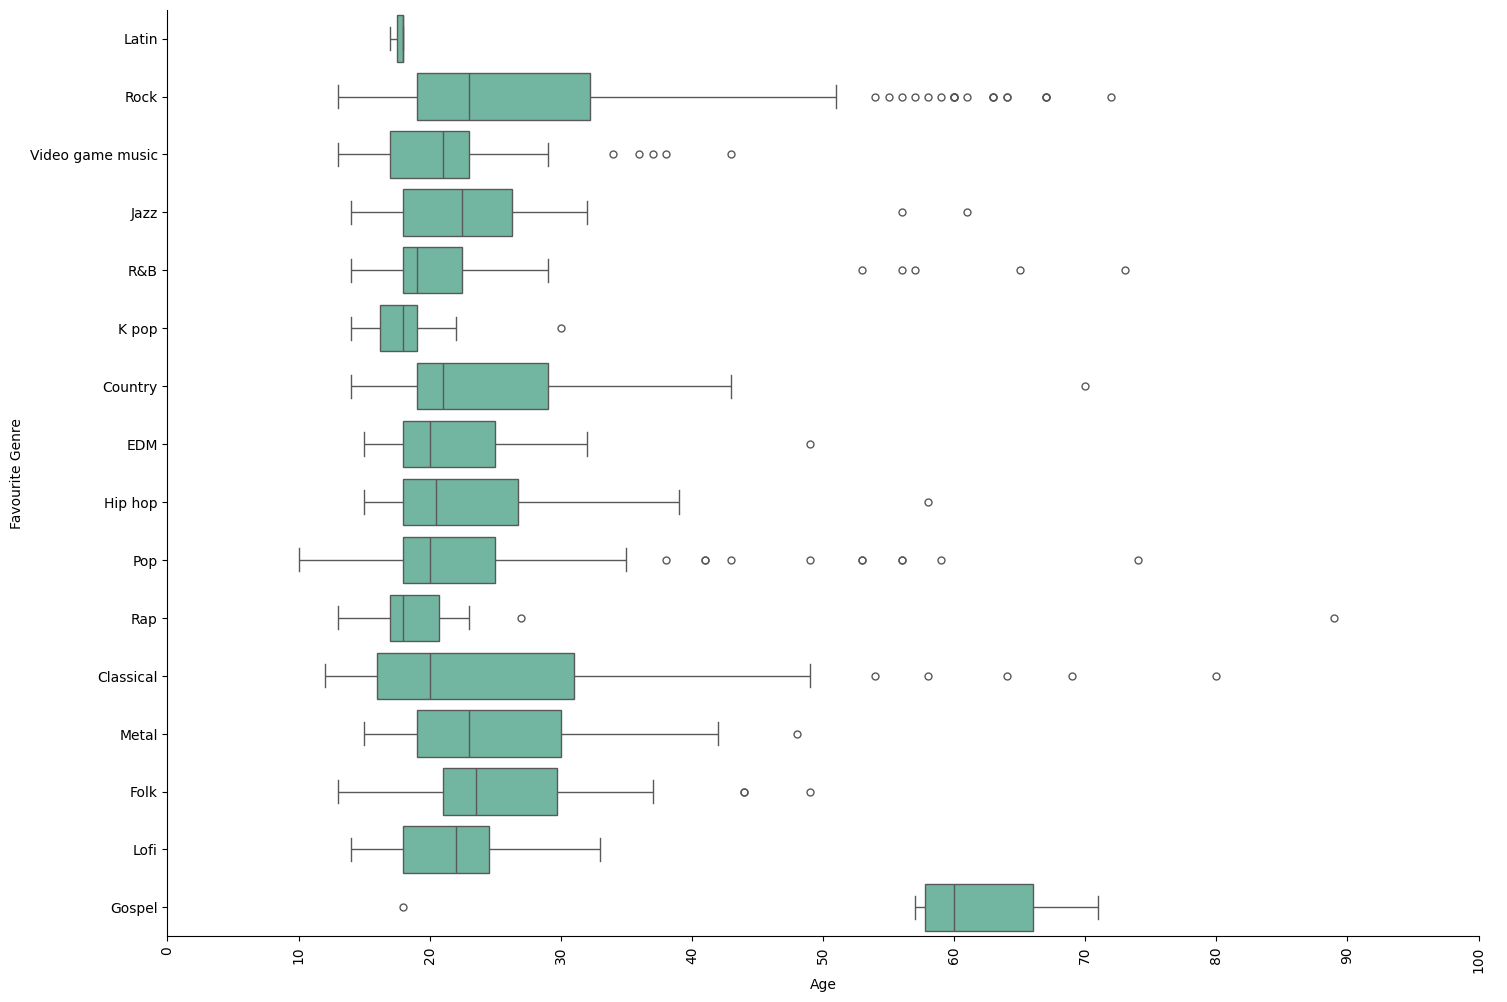

In [ ]:
# is there a relationship between age and genre preference?
g = sns.catplot(x='Age', y='Fav genre', data=df, kind='box', height=10, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set_xlabels('Age')
g.set_ylabels('Favourite Genre')
g.set_titles('Age vs Favourite Genre')
plt.show()

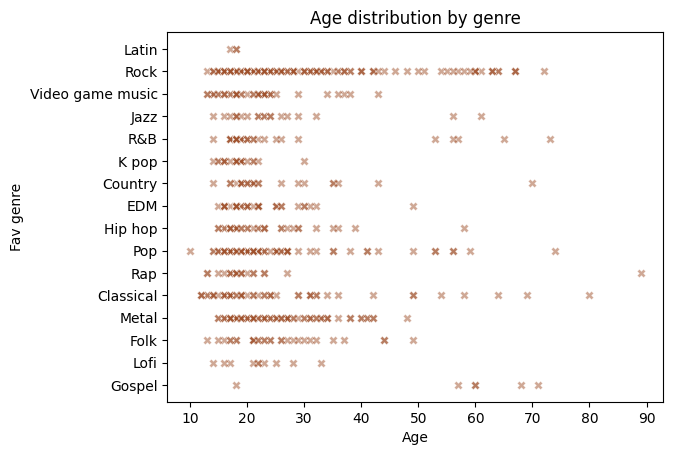

In [ ]:
# age and genre

sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "sienna")
plt.title('Age distribution by genre');

Rock has the most diverse range of ages. Classical and Pop listeners also have a wider range of ages compared to other genres. Some music genres, such as K pop and Lofi appear to attract a more specific and younger age group.

Mental Health

<ipython-input-21-0acefe294eea>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
<ipython-input-21-0acefe294eea>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b2 = ax.bar(x-width, df[(df.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist")
<ipython-input-21-0acefe294eea>:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a 

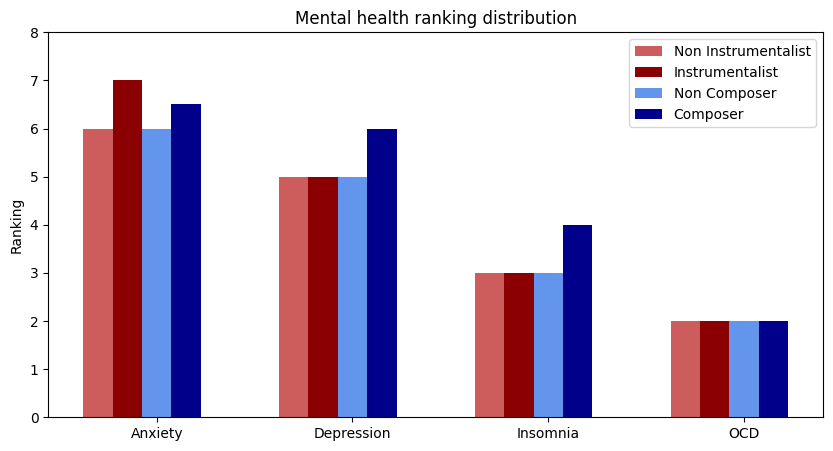

In [ ]:
labels = ['Anxiety', 'Depression','Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
b2 = ax.bar(x-width, df[(df.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist")
b3 = ax.bar(x, df[(df.Composer == 0)].median()[-4:], width, color = 'cornflowerblue', label = "Non Composer")
b4 = ax.bar(x+width, df[(df.Composer == 1)].median()[-4:], width, color = 'darkblue', label = "Composer")

ax.set_ylim([0, 8])
ax.set_ylabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

Instrumentalists and composers have slightly higher Mental Health rankings. However, OCD rankings are low regardless of musical background.

How Music affects the Mental Health

Text(0.5, 1.0, 'Effects on Mental Health')

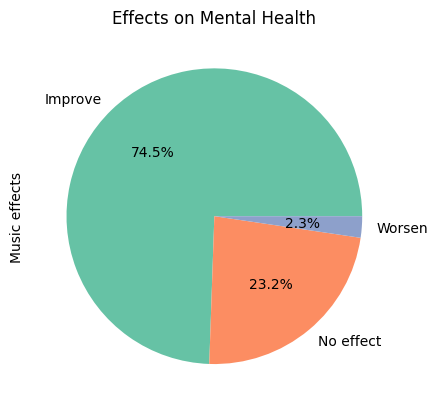

In [ ]:
# plot the pie chart of music effects
df['Music effects'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Effects on Mental Health')

The majority of respondents find that music has a positive impact on their mental health. Of the remaining respondents, only 15 individuals reported music having a negative impact.

<ipython-input-24-876220f7bae5>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_fav_genre = df_fav_genre.groupby(['Fav genre', 'Music effects']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Percentage')
<ipython-input-24-876220f7bae5>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


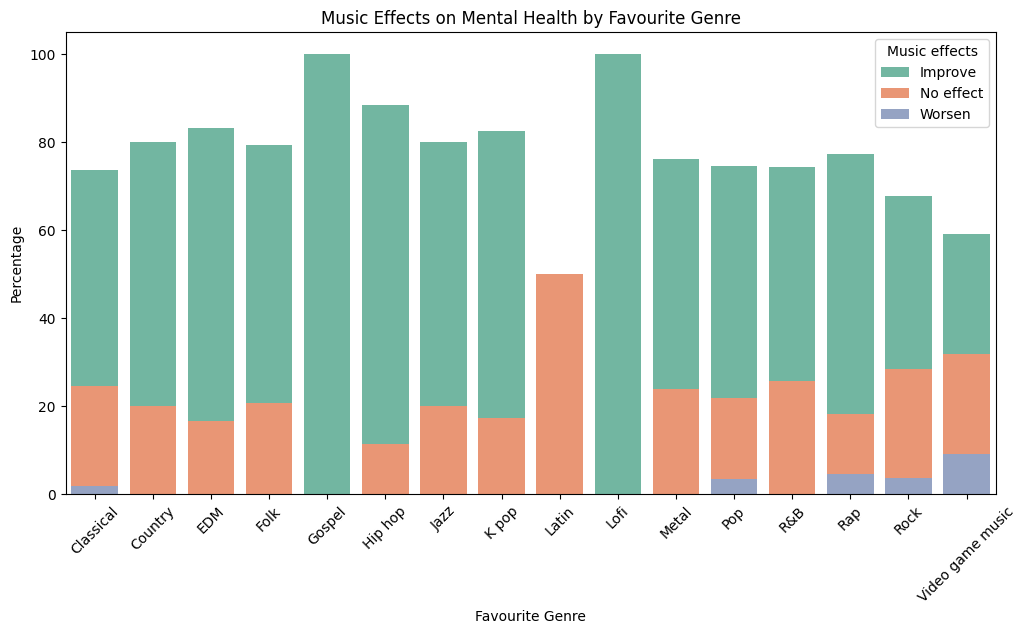

In [ ]:
# Which genre has the highest ratio of listeners who believe their fav genre has a positive effect on their mental health?

df_fav_genre = df[['Fav genre', 'Music effects']]

# normalize the counts
df_fav_genre = df_fav_genre.groupby(['Fav genre', 'Music effects']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Percentage')

# plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Fav genre', y='Percentage', hue='Music effects', data=df_fav_genre, dodge=False, ax=ax)
ax.set_title('Music Effects on Mental Health by Favourite Genre')
ax.set_xlabel('Favourite Genre')

# tilt x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Percentage')

plt.show()

Regardless of genre, the vast majority of respondents agree that music has a positive impact on mental health. This is corroborated by the "Effects of Music on Mental Health" figure.
Individuals who selected Gospel and Lofi as their favorite genre unanimously find music beneficial.
Individuals who selected Video Game Music as their favorite genre have the most diverse distribution of responses. Roughly 40% of these respondents did not find music beneficial at all, with 10% of respondents reporting a negative impact on their mental health.
The only other respondents that found music detrimental were respondents who selected Classical, Pop, Rap, or Rock music as their top genre.

It seems majority of the listeners think music improves their mental health. Let's see how music affects mental health using correlation matrix.

BPM - Beats per Minute

In [ ]:
# distribution of BPM
df['BPM'].describe()

count    6.290000e+02
mean     1.589948e+06
std      3.987261e+07
min      0.000000e+00
25%      1.000000e+02
50%      1.200000e+02
75%      1.440000e+02
max      1.000000e+09
Name: BPM, dtype: float64

It seems there are outliers in the BPM data: How is it possible that the maximum BPM is larger than 500? Let's replace them with median values.

The survey system isn't perfect. Online trolls claiming to listen to music with 999999999 BPM may mess up data.

In [ ]:
# replace 1e9 with None in BPM column
df['BPM'] = df['BPM'].apply(lambda x: df['BPM'].median() if x > 500 else x)

# distribution of BPM
df['BPM'].describe()

count    629.000000
mean     122.616852
std       33.852120
min        0.000000
25%      100.000000
50%      120.000000
75%      143.000000
max      220.000000
Name: BPM, dtype: float64

In [ ]:
# plot the correlation matrix heatmap

# encode the ordinal categorical variables in frequency columns

column_freq = ['Age', 'Hours per day', 'While working', 'Exploratory', 'BPM',
                 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']

freq2num = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
df_genre = df[[col for col in df.columns if col.startswith('Frequency')]]
df_genre.replace(freq2num, inplace=True)
df_sel = pd.concat([df[column_freq], df_genre], axis=1)
df_sel.head()


<ipython-input-26-9d03422c6e2d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre.replace(freq2num, inplace=True)


,Age,Hours per day,While working,Exploratory,BPM,Anxiety,Depression,Insomnia,OCD,Music effects,...,Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,18.0,3.0,1.0,1,156.0,3.0,0.0,1.0,0.0,NaN,...,0,3,3,1,0,3,2,3,0,2
1,63.0,1.5,1.0,1,119.0,7.0,2.0,2.0,1.0,NaN,...,3,1,2,1,0,2,2,1,3,1
2,18.0,4.0,0.0,0,132.0,7.0,7.0,10.0,2.0,No effect,...,1,3,0,2,2,1,0,1,1,3
3,61.0,2.5,1.0,1,84.0,9.0,7.0,3.0,3.0,Improve,...,3,2,3,2,0,2,2,0,0,0
4,18.0,4.0,1.0,1,107.0,7.0,2.0,5.0,9.0,Improve,...,0,3,2,2,0,2,3,3,0,1


In [ ]:
# encode the categorical variables into numerical values
df_sel['While working'] = df_sel['While working'].map({'Yes': 1, 'No': 0})
df_sel['Exploratory'] = df_sel['Exploratory'].map({'Yes': 1, 'No': 0})
df_sel['Music effects'] = df_sel['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})

Correlation matrix

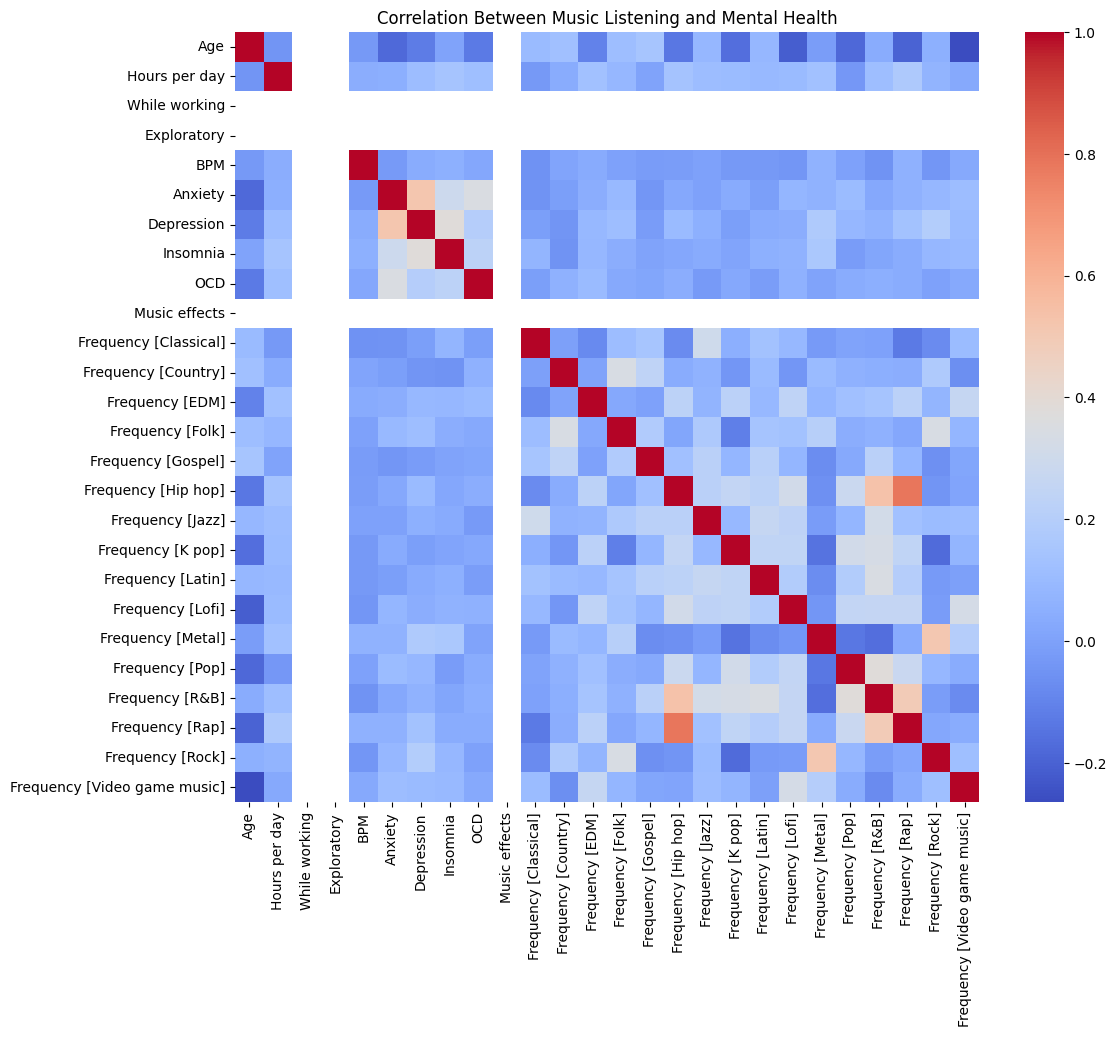

In [ ]:
# plot the correlation matrix heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(df_sel.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Between Music Listening and Mental Health')

plt.show()

This correlation heatmap does not tell us much about what features contributes a lot to improving mental health (which is evaluated by listeners themselves).

But it reveals some interesting correlations between music genres: listeners who listen to hip-hop are more like to listen to rap and R&B, and metal listeners are more likely to listen to rock.

Also, it seems that anxiety and depression are correlated. This is not surprising, as they are both mental health issues.

How about the relationship between favorite music genres and mental health status?

<ipython-input-31-7dd6e1245055>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fav_genre['Music effects'] = df_fav_genre['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})


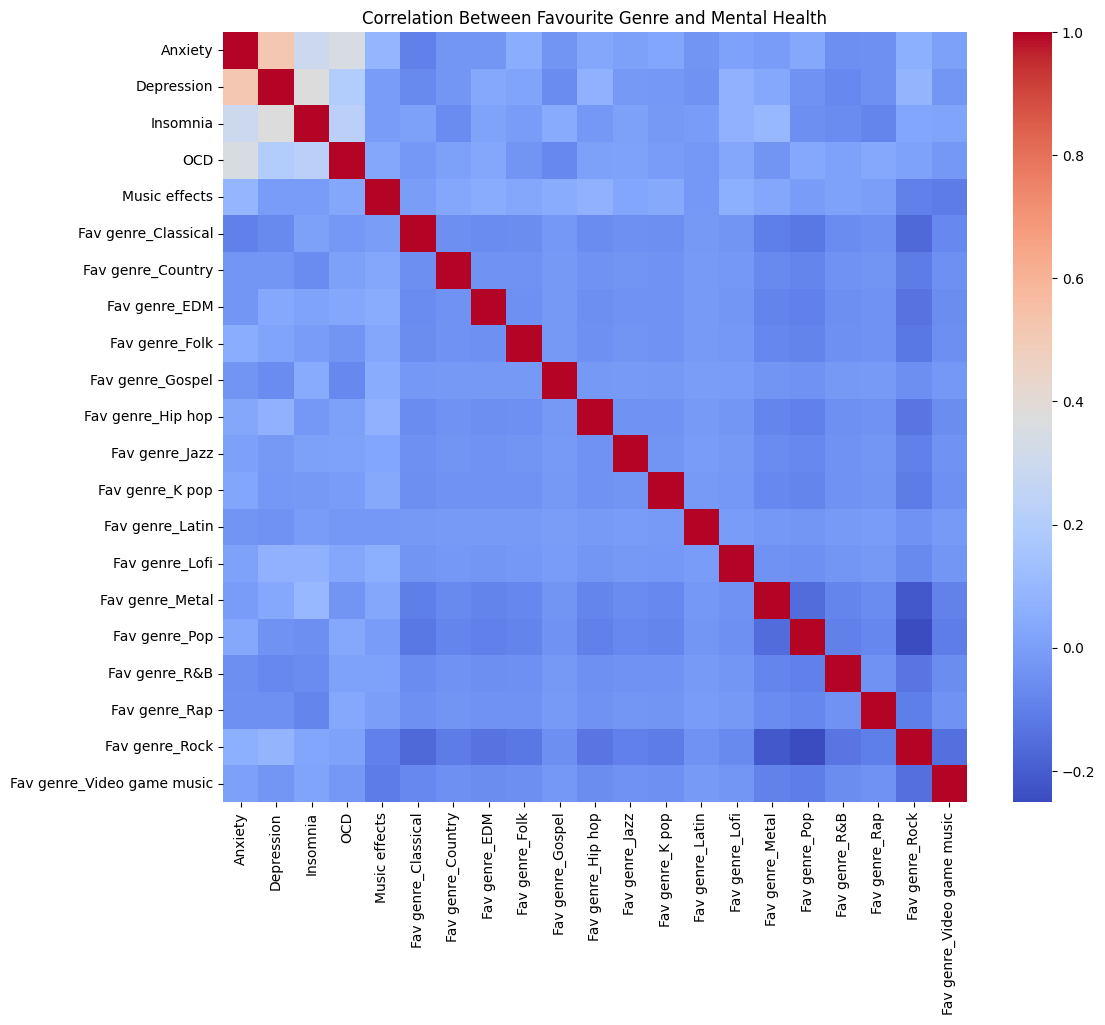

In [ ]:
# how about fav genre and mental health?

df_fav_genre = df[['Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']]
df_fav_genre['Music effects'] = df_fav_genre['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})

df_fav_genre = pd.get_dummies(df_fav_genre, columns=['Fav genre'])

# plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_fav_genre.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Between Favourite Genre and Mental Health')

plt.show()